### Importing Libraries

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [26]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [27]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [28]:
for x, y in training_set:
    print(x, x.shape)
    print(y, y.shape)
    break

# x is training example and y is label

tf.Tensor(
[[[[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  ...

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     

### importing Libraries

In [29]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [30]:
# model loading
model = Sequential()

In [31]:
#Building Convolution Layer

model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu')) #input shape needs to be paased only in the first layer
model.add(MaxPool2D(pool_size=2, strides =2))

In [32]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides =2))

In [33]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides =2))

In [34]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides =2))

In [35]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides =2))

In [36]:
model.add(Dropout(0.25)) #to avoid overfitting

In [37]:
#flatten layer

model.add(Flatten())

In [38]:
#dense layer

model.add(Dense(units=1500, activation='relu'))

In [39]:
model.add(Dropout(0.25))


In [40]:
#Output Layer
#no of output classes = 38
model.add(Dense(units=38, activation='softmax'))

In [41]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics = ['accuracy'])

In [42]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10


I0000 00:00:1731177508.784665     118 service.cc:145] XLA service 0x7d40b8006b60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731177508.784724     118 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


   7/2197 ━━━━━━━━━━━━━━━━━━━━ 58s 27ms/step - accuracy: 0.0218 - loss: 4.4405    

I0000 00:00:1731177517.086712     118 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_5', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_4', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_3', 4 bytes spill stores, 12 bytes spill loads

I0000 00:00:1731177517.096254     118 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3941 - loss: 2.1730

I0000 00:00:1731177609.859449     121 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_5', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_4', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_3', 4 bytes spill stores, 12 bytes spill loads



2197/2197 ━━━━━━━━━━━━━━━━━━━━ 126s 52ms/step - accuracy: 0.3942 - loss: 2.1726 - val_accuracy: 0.8262 - val_loss: 0.5495
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 65s 30ms/step - accuracy: 0.8383 - loss: 0.5048 - val_accuracy: 0.9122 - val_loss: 0.2723
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 65s 29ms/step - accuracy: 0.9074 - loss: 0.2847 - val_accuracy: 0.9340 - val_loss: 0.1994
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 65s 29ms/step - accuracy: 0.9393 - loss: 0.1861 - val_accuracy: 0.9264 - val_loss: 0.2307
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 65s 29ms/step - accuracy: 0.9518 - loss: 0.1437 - val_accuracy: 0.9307 - val_loss: 0.2130
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 65s 29ms/step - accuracy: 0.9642 - loss: 0.1030 - val_accuracy: 0.9476 - val_loss: 0.1786
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 65s 29ms/step - accuracy: 0.9699 - loss: 0.0891 - val_accuracy: 0.9475 - val_loss: 0.1762
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 65s 29ms/step - accuracy: 0.9759 - loss: 0.0

In [45]:
print(train_loss, train_acc)

NameError: name 'train_loss' is not defined

In [46]:
#Model Evaluation on validation set

valid_loss, valid_acc= model.evaluate(validation_set)



550/550 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9595 - loss: 0.1304


In [47]:
print(valid_loss, valid_acc)

0.13648760318756104 0.9594810009002686


In [48]:
#saving_model
model.save("trained_plant_model.keras")


In [49]:
#recording model history in JSON format

import json
with open("training_history.json","w") as f:
    json.dump(training_history.history,f)

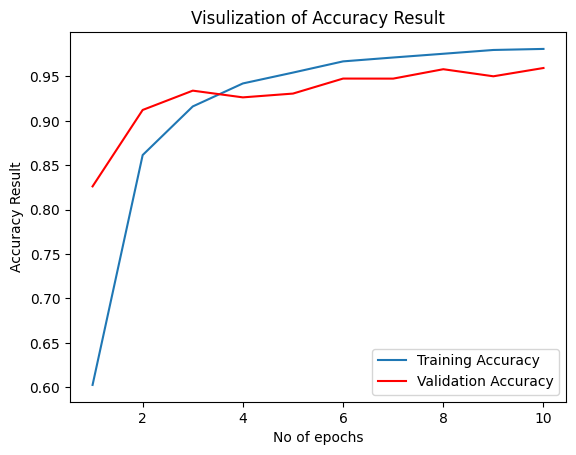

In [50]:
#accuracy_visualization
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'], color='red', label='Validation Accuracy')
plt.xlabel("No of epochs")
plt.ylabel("Accuracy Result")
plt.title("Visulization of Accuracy Result")
plt.legend()
plt.show()

### some other metrics for model evaluation

In [52]:
class_name = validation_set.class_names

In [53]:
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [58]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False, #will pass sequentially
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [60]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

# for each image of 17572 it will give the 38 probabilities falling into each 38 categories

550/550 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step


(array([[9.9999893e-01, 1.1105139e-06, 1.0623116e-10, ..., 1.1194795e-16,
         1.1981262e-14, 2.3381443e-13],
        [9.9997520e-01, 2.3078743e-05, 3.3682550e-09, ..., 1.3896230e-12,
         3.5039354e-12, 1.1359883e-10],
        [1.0000000e+00, 2.6354363e-09, 5.1679006e-13, ..., 1.9758762e-21,
         1.0096194e-18, 9.5821082e-18],
        ...,
        [4.1721401e-10, 2.5913671e-13, 2.4932110e-09, ..., 8.1967121e-11,
         1.4726479e-11, 9.9999416e-01],
        [1.5832632e-11, 2.4254090e-14, 1.0265737e-10, ..., 1.7007038e-11,
         1.0980418e-12, 1.0000000e+00],
        [4.6749683e-12, 4.1701980e-14, 1.9828003e-13, ..., 1.0820133e-14,
         1.1500107e-13, 9.9999976e-01]], dtype=float32),
 (17572, 38))

In [64]:
# take the class having maximum value
predicted_categories = tf.argmax(y_pred, axis =1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [66]:
true_categories = tf.concat([y for x,y in test_set], axis = 0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [68]:
Y_true = tf.argmax(true_categories, axis =1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [73]:
from sklearn.metrics import classification_report

In [75]:
print(classification_report(Y_true, predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.96      0.96       504
                                 Apple___Black_rot       0.98      0.99      0.99       497
                          Apple___Cedar_apple_rust       0.98      0.97      0.98       440
                                   Apple___healthy       0.98      0.95      0.96       502
                               Blueberry___healthy       0.96      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.99      0.99       421
                 Cherry_(including_sour)___healthy       0.96      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.86      0.91       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.88      0.98      0.

In [79]:
 #calculate consuion matrix
from sklearn.metrics import confusion_matrix

In [84]:
cm = confusion_matrix(Y_true, predicted_categories)

In [88]:
print(cm)
print(cm.shape)

[[483   6   0 ...   0   1   0]
 [  0 494   0 ...   0   0   0]
 [  0   0 429 ...   0   0   0]
 ...
 [  0   0   0 ... 481   0   0]
 [  0   0   0 ...   0 447   0]
 [  0   0   0 ...   0   0 479]]
(38, 38)


<function matplotlib.pyplot.show(close=None, block=None)>

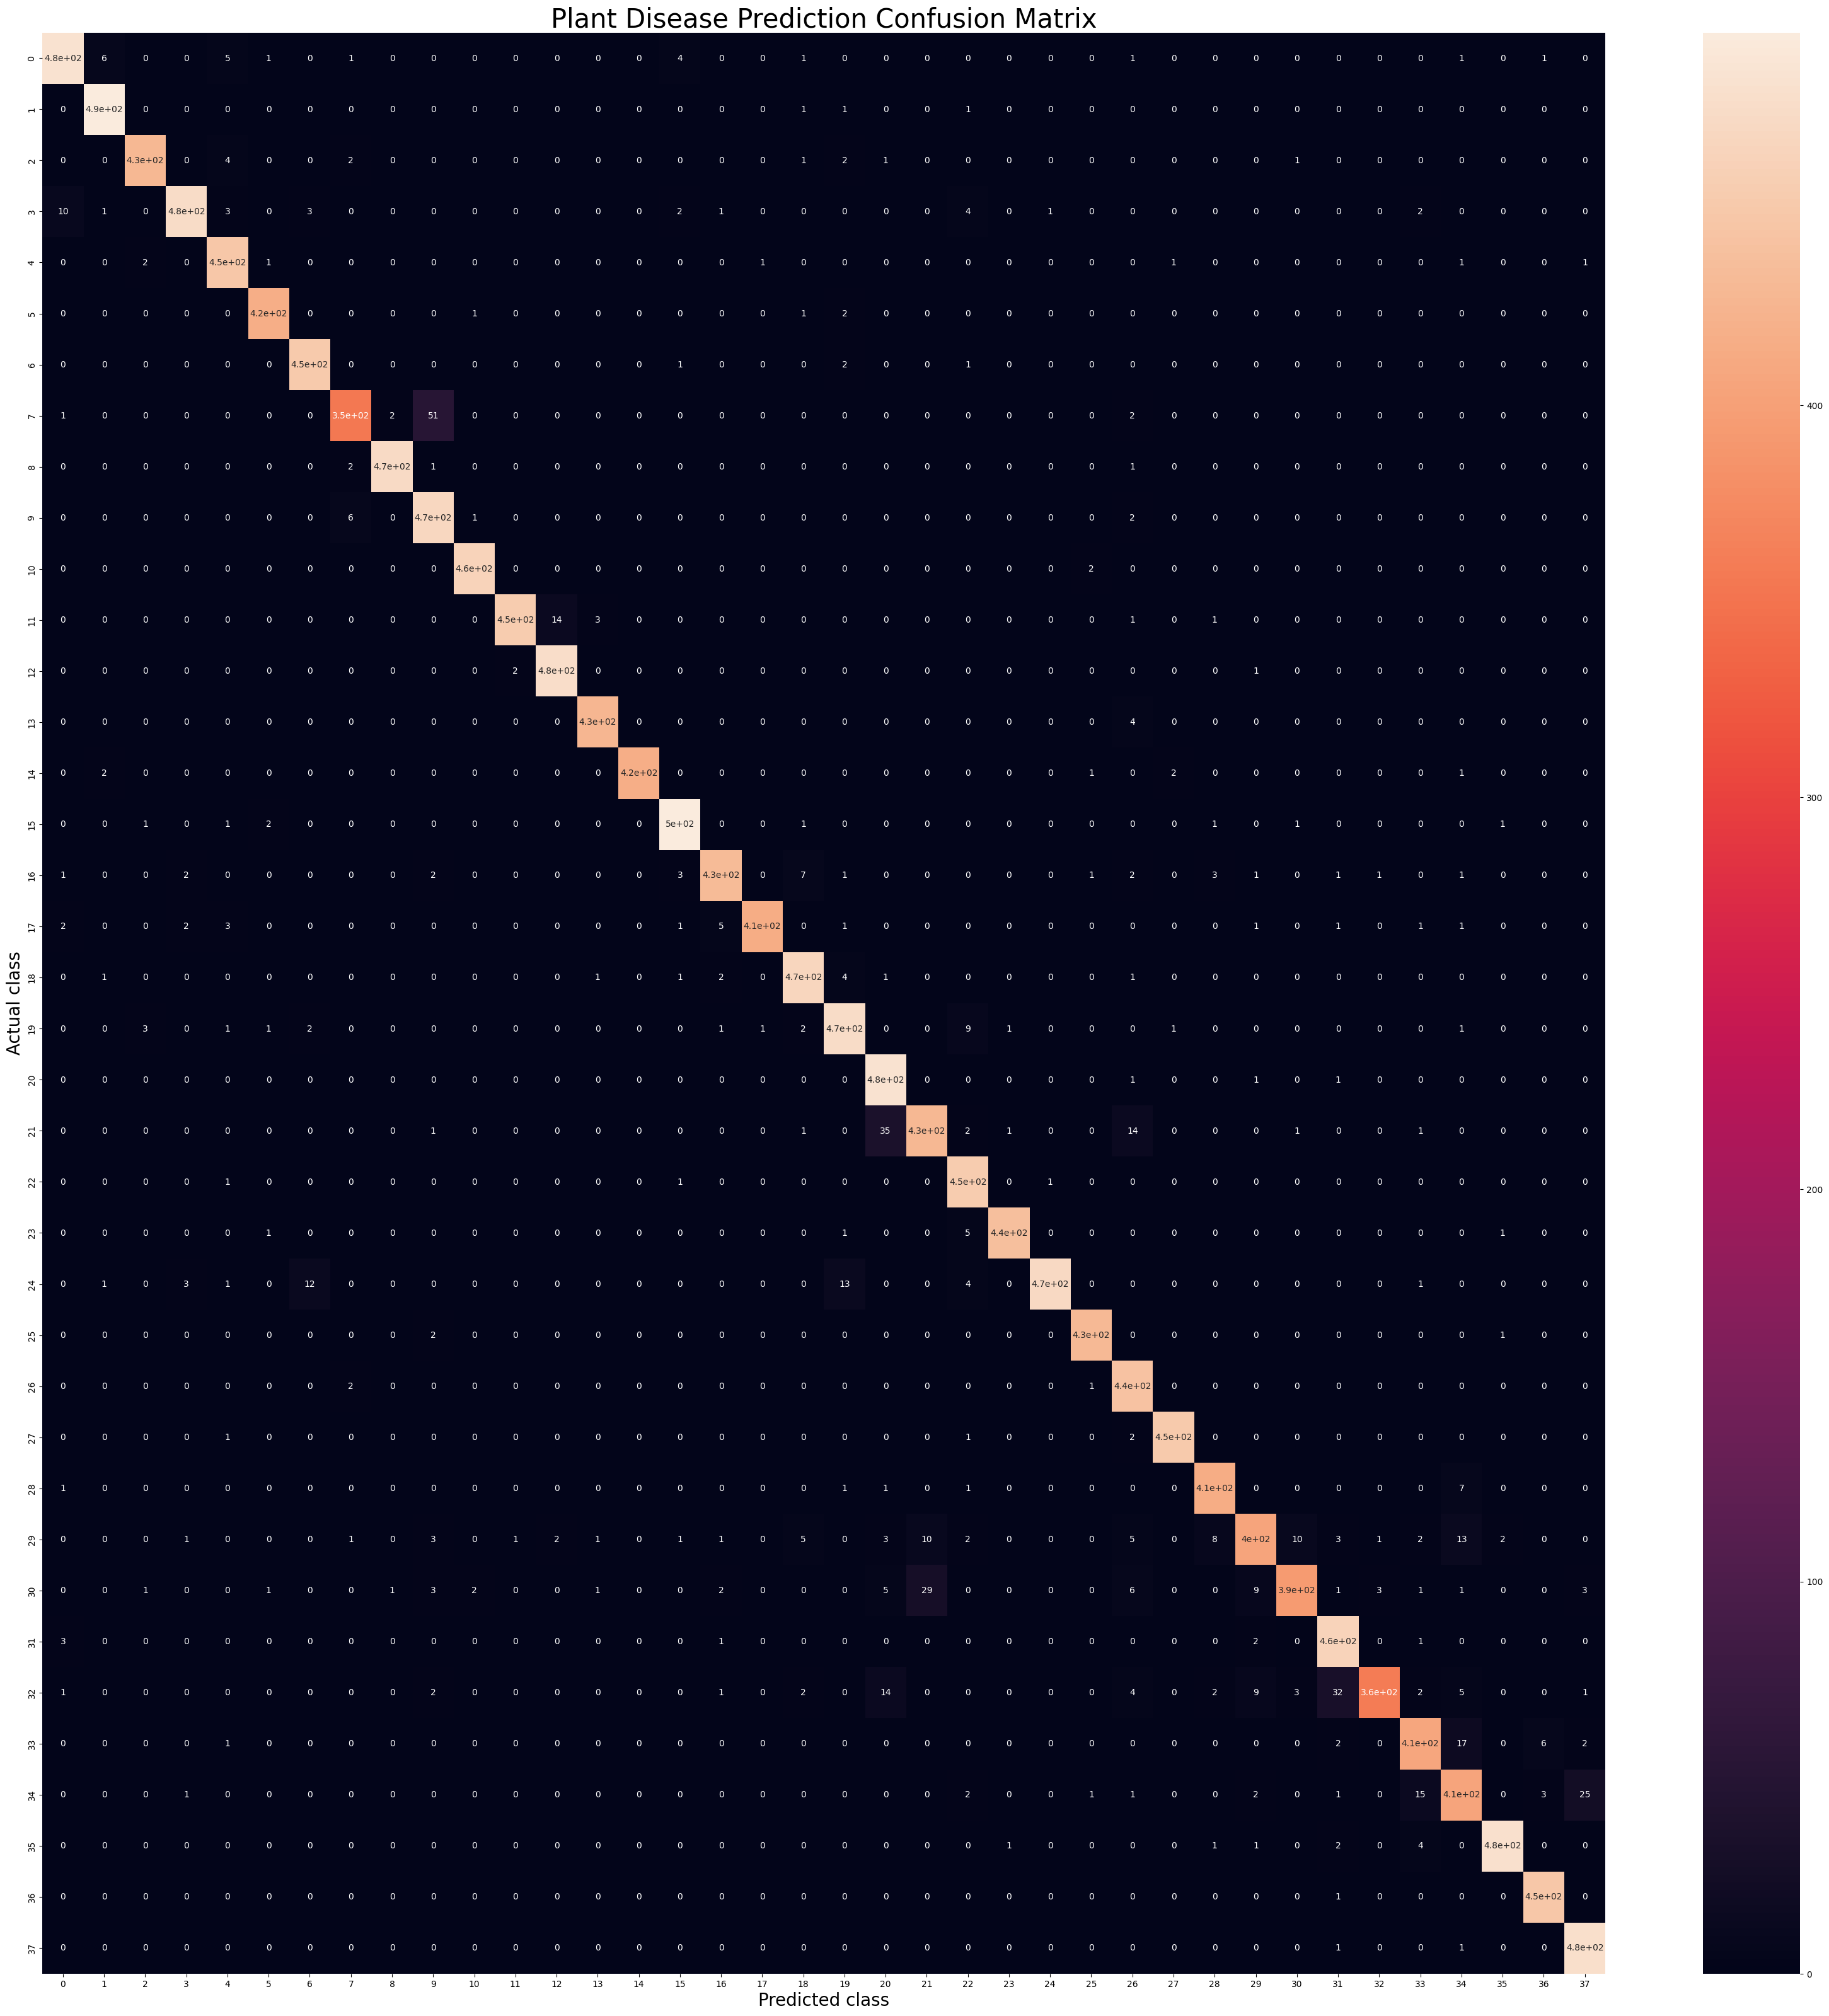

In [103]:
# visualization
plt.figure(figsize=(40,40))
sns.heatmap(cm, annot=True,annot_kws={'size':10})
plt.xlabel("Predicted class", fontsize=20)
plt.ylabel("Actual class", fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix", fontsize = 30)
plt.show